In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
names=['sepal_length','sepal_width','petal_length','petal_width','class']
df=pd.read_csv("/content/iris_data.csv",names=names)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


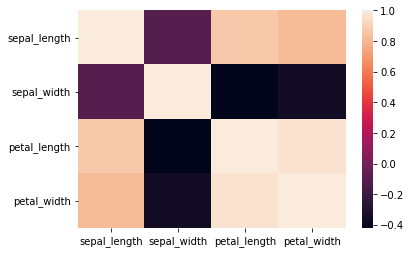

In [8]:
sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fc1a0ce50>,
      dtype=object)

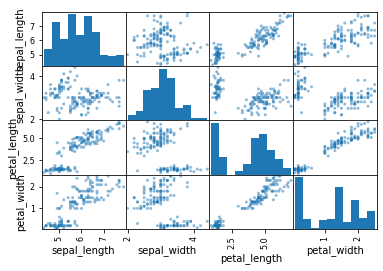

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

sepal_length       AxesSubplot(0.125,0.536818;0.227941x0.343182)
sepal_width     AxesSubplot(0.398529,0.536818;0.227941x0.343182)
petal_length    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
petal_width           AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

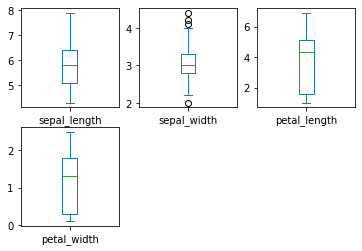

In [10]:
df.plot(kind='box',subplots=True,layout=(2,3))

In [11]:
def remove_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    low_range=q1-(1.5*iqr)
    up_range=q3+(1.5*iqr)
    return low_range,up_range
low_ra,up_ra=remove_outliers(df['sepal_width'])
df['sepal_width']=np.where(df['sepal_width']>up_ra,up_ra,df['sepal_width'])
df['sepal_width']=np.where(df['sepal_width']<low_ra,low_ra,df['sepal_width'])

sepal_length       AxesSubplot(0.125,0.536818;0.227941x0.343182)
sepal_width     AxesSubplot(0.398529,0.536818;0.227941x0.343182)
petal_length    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
petal_width           AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

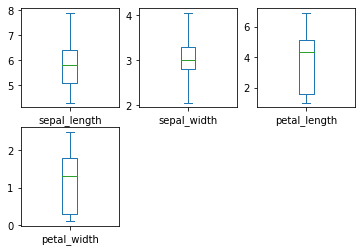

In [12]:
df.plot(kind='box',subplots=True,layout=(2,3))

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['class']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [15]:
dt=DecisionTreeClassifier()

In [16]:
dt=dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [17]:
metrics.accuracy_score(ytest,ypred)

0.9736842105263158

In [18]:
metrics.confusion_matrix(ytest,ypred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [19]:
text_representation=tree.export_text(dt)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [20]:
from sklearn import datasets
names=['sepal_length','sepal_width','petal_length','petal_width','class']
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [21]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

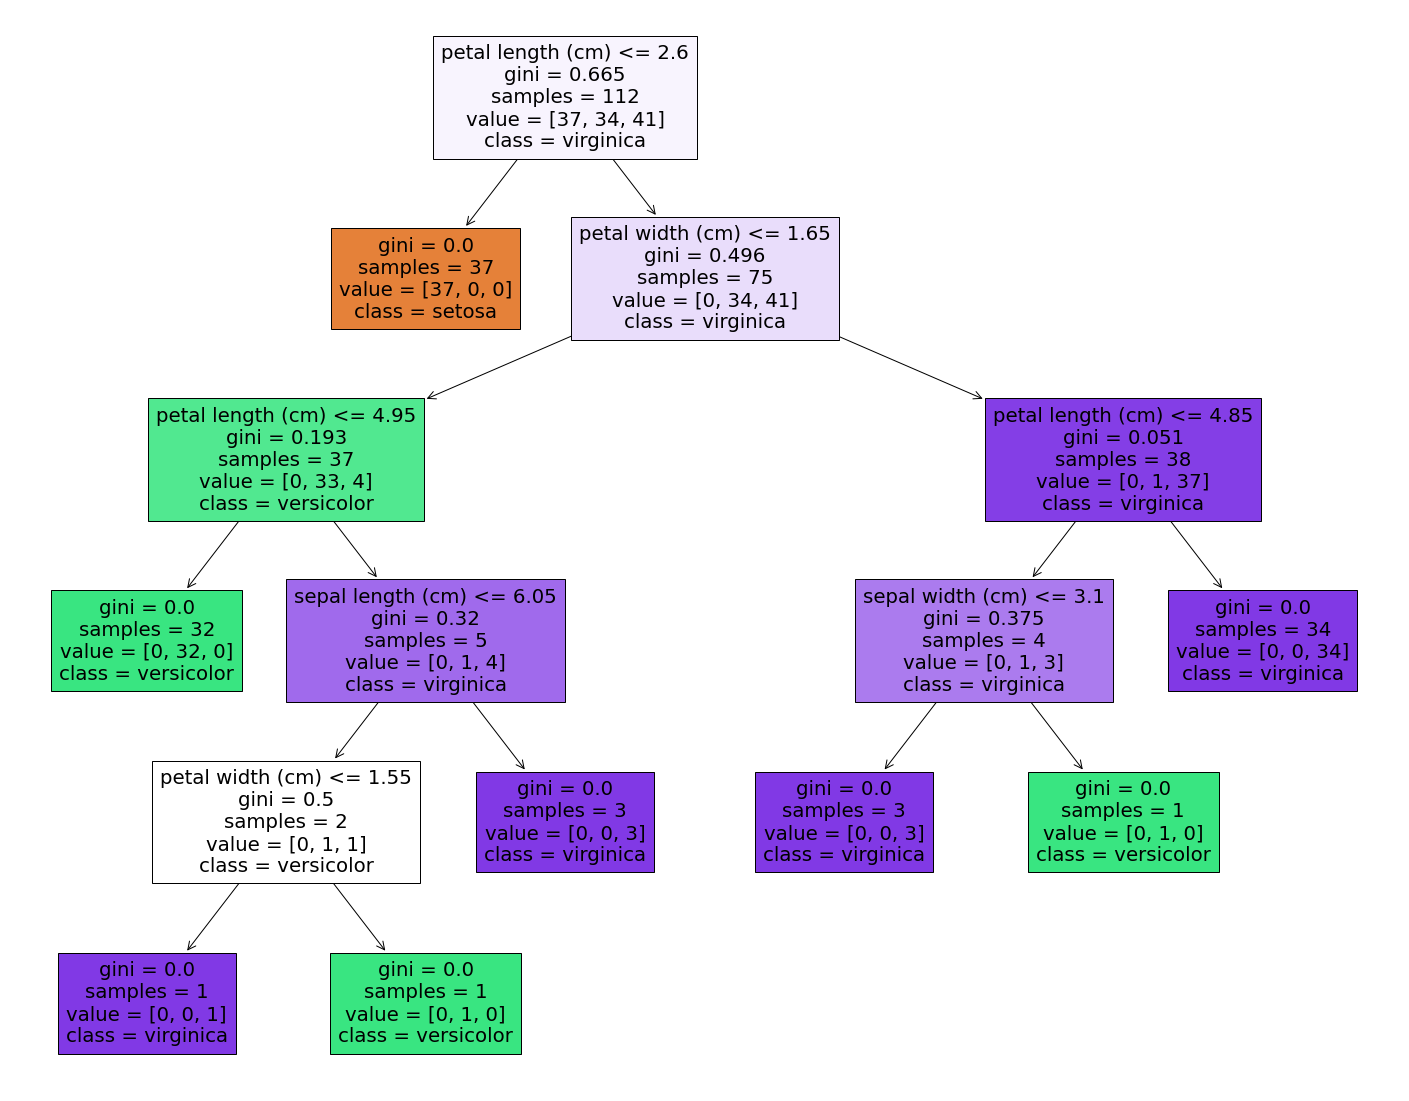

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=iris.feature_names,
                   class_names=iris.target_names, filled=True)